# Classification model to recognize spoken digits using the AudioMNIST dataset

In [1]:
from scipy.io import wavfile
import librosa
import glob, os
import numpy as np

audio_files = []

directory = "C:/Users/damia/AudioMNIST/data" # input dataset directory
max_files = 15 # limit number of files to ensure better performance
sr = 22050 # sample rate of the audio

for file_number in range(1, max_files + 1):
    directory_path = directory + (f"/0{file_number}" if file_number < 10 else f"/{file_number}")
    wav_paths = glob.glob(os.path.join(directory_path, '*.wav'))
    audio_files += [librosa.load(wav_path, sr = sr)[0] for wav_path in wav_paths]

max_length = sr
audio_files = np.array([np.pad(arr, (0, max_length - len(arr)), 'constant') for arr in audio_files])
labels = np.tile(np.repeat(np.arange(10), 50), max_files)

audio_files.shape, labels.shape

((7500, 22050), (7500,))

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(audio_files, labels, test_size = 1/3, random_state = 44, shuffle = True)
X_train.shape, y_train.shape

((5000, 22050), (5000,))

In [3]:
from scipy.io import wavfile as wf
filename = "C:/Users/damia/test_audio/audio_file.wav"
sr = 11025 # sample rate
wf.write(filename, sr, X_train[0])

### Preprocessing

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 500)
pcs = pca.fit_transform(X_train, y_train)

In [5]:
sum(pca.explained_variance_ratio_)

0.947121882069041

In [6]:
import tensorflow as tf

In [7]:
data = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

### NN and training

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(32, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool1D(padding = 'valid', pool_size = 3, strides = 4))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv1D(128, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool1D(padding = 'same', pool_size = 2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(len(np.unique(y_train)), activation = 'softmax'))

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False)
model.compile(optimizer = 'adam', loss = loss_fn, metrics = ['accuracy'])
model_fit = model.fit(data, y_train, batch_size = 32, epochs = 10, validation_data = (X_train[-500:], y_train[-500:]))
model.summary()

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 307ms/step - accuracy: 0.1768 - loss: 2.1950 - val_accuracy: 0.4860 - val_loss: 1.5119
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 312ms/step - accuracy: 0.5420 - loss: 1.4048 - val_accuracy: 0.7020 - val_loss: 0.9737
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 309ms/step - accuracy: 0.7016 - loss: 0.9291 - val_accuracy: 0.8100 - val_loss: 0.6572
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 317ms/step - accuracy: 0.8022 - loss: 0.6282 - val_accuracy: 0.8460 - val_loss: 0.4877
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 323ms/step - accuracy: 0.8657 - loss: 0.4435 - val_accuracy: 0.8880 - val_loss: 0.3242
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 319ms/step - accuracy: 0.9057 - loss: 0.3221 - val_accuracy: 0.9400 - val_loss: 0.2217
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 317ms/step - accuracy: 0.9292 - loss: 0.2439 - val_accuracy: 0.9240 - val_loss: 0.2256
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 320ms/step - accuracy: 0.9551 - loss: 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 22048, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 5512, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5512, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 5510, 128)      │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 2755, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2755, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 352640)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │     3,526,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,616,864 (40.50 MB)

 Trainable params: 3,538,954 (13.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,077,910 (27.00 MB)

In [23]:
model.evaluate(X_test, y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.7849 - loss: 0.8486


[0.8629116415977478, 0.7871999740600586]

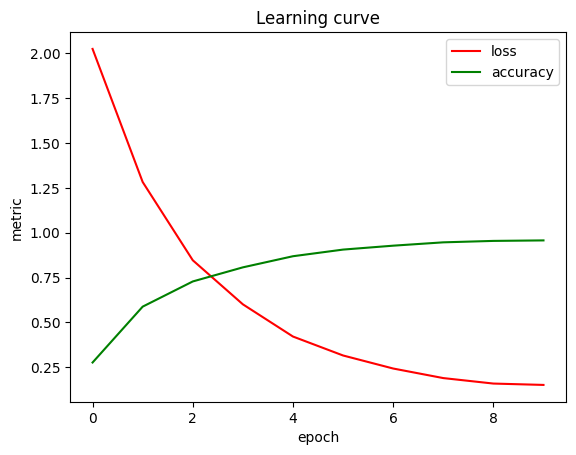

In [25]:
import matplotlib.pyplot as plt

def plot_error(model_fit):
    plt.title("Learning curve")
    plt.plot(model_fit.epoch, model_fit.history['loss'], color = 'red', label = 'loss')
    plt.plot(model_fit.epoch, model_fit.history['accuracy'], color = 'green', label = 'accuracy')
    plt.xlabel("epoch")
    plt.ylabel("metric")
    plt.legend()
    plt.show()

plot_error(model_fit)